In [28]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [29]:
dataset = pd.read_csv("../2019-2023full_data/data_info_main_par.csv")
dataset["Time"] = pd.to_datetime(dataset["Time"])
# 根据日期（天）对数据进行分组，并计算每一天的平均气温
daily_average = dataset.groupby(dataset["Time"].dt.date).agg({"Temperature": "mean", "Relative Humidity": "mean"}).reset_index()

# 创建一个新的DataFrame，包含日期和对应的平均气温
new_data = pd.DataFrame({"Time": daily_average["Time"], "Temperature": daily_average["Temperature"],"Relative Humidity": daily_average["Relative Humidity"]})
new_data["THI"] = 0.81 * new_data["Temperature"] + 0.01 * 0.01 * new_data["Relative Humidity"] * (0.99 * new_data["Temperature"] - 14.3) + 46.3
# 将Time列转换为日期类型
new_data['Time'] = pd.to_datetime(new_data['Time']).dt.date
new_data

,Time,Temperature,Relative Humidity,THI
0,2019-07-31,26.095238,91.500000,67.542682
1,2019-08-01,26.515152,93.545455,67.889060
2,2019-08-02,26.906250,91.500000,68.206948
3,2019-08-03,26.642857,91.750000,67.991516
4,2019-08-04,27.750000,82.875000,68.886667
...,...,...,...,...
1561,2023-11-08,25.000000,76.958333,66.630421
1562,2023-11-09,25.625000,81.083333,67.145999
1563,2023-11-10,26.958333,82.291667,68.238199
1564,2023-11-11,25.208333,84.750000,66.809062


In [30]:
data_2020 = new_data[new_data["Time"].astype(str).str[:4] == '2020']
new_data_2020 = pd.DataFrame({"Time": data_2020["Time"], "Temperature": data_2020["Temperature"],"Relative Humidity": data_2020["Relative Humidity"]}).reset_index().drop("index",axis=1)
new_data_2020["Time"] = new_data_2020["Time"].astype(str).str[-5:]
new_data_2020.drop(59,inplace=True)
new_data_2020

,Time,Temperature,Relative Humidity
0,01-01,17.750000,80.250000
1,01-02,18.416667,77.916667
2,01-03,18.916667,81.500000
3,01-04,19.208333,82.958333
4,01-05,19.833333,78.833333
...,...,...,...
361,12-27,20.375000,71.875000
362,12-28,20.583333,68.500000
363,12-29,20.916667,74.791667
364,12-30,15.541667,51.708333


In [31]:
data_2021 = new_data[new_data["Time"].astype(str).str[:4] == '2021']
new_data_2021 = pd.DataFrame({"Time": data_2021["Time"], "Temperature": data_2021["Temperature"],"Relative Humidity": data_2021["Relative Humidity"]}).reset_index().drop("index",axis=1)
new_data_2021["Time"] = new_data_2021["Time"].astype(str).str[-5:]

In [32]:
data_2022 = new_data[new_data["Time"].astype(str).str[:4] == '2022']
new_data_2022 = pd.DataFrame({"Time": data_2022["Time"], "Temperature": data_2022["Temperature"],"Relative Humidity": data_2022["Relative Humidity"]}).reset_index().drop("index",axis=1)
new_data_2022["Time"] = new_data_2022["Time"].astype(str).str[-5:]

In [33]:
data_2023 = new_data[new_data["Time"].astype(str).str[:4] == '2023']
new_data_2023 = pd.DataFrame({"Time": data_2023["Time"], "Temperature": data_2023["Temperature"],"Relative Humidity": data_2023["Relative Humidity"]}).reset_index().drop("index",axis=1)
new_data_2023["Time"] = new_data_2023["Time"].astype(str).str[-5:]

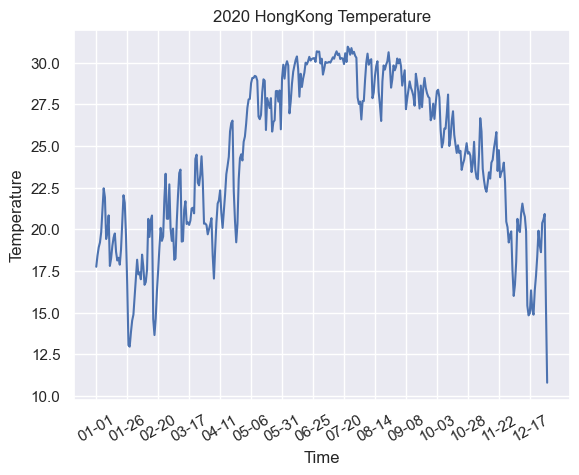

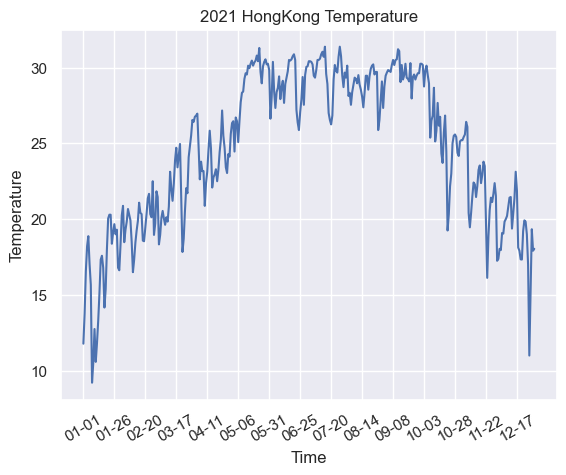

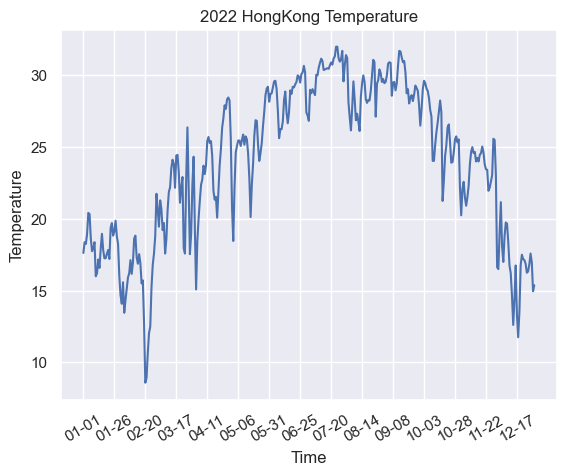

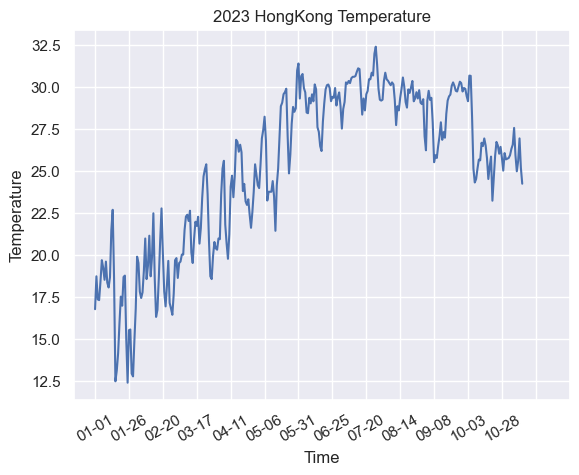

In [34]:
sns.set()
plt.plot(new_data_2020["Time"],new_data_2020["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2020 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2021["Time"],new_data_2021["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2021 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2022["Time"],new_data_2022["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2022 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

plt.plot(new_data_2023["Time"],new_data_2023["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2023 HongKong Temperature")
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


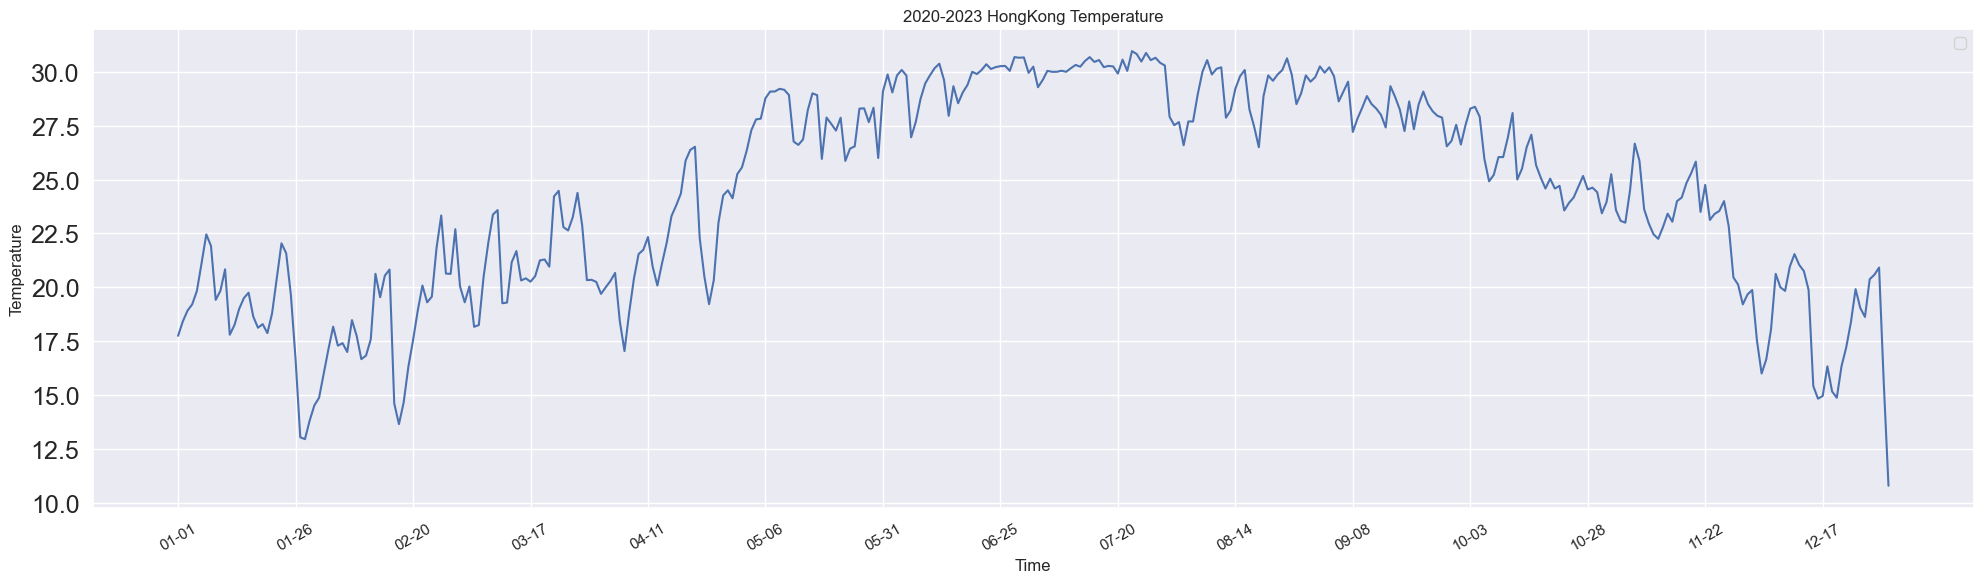

In [35]:
sns.set()
plt.figure(figsize=(20, 6))
plt.plot(new_data_2020["Time"],new_data_2020["Temperature"])
# 
# plt.plot(new_data_2021["Time"],new_data_2021["Temperature"])
# 
# plt.plot(new_data_2022["Time"],new_data_2022["Temperature"])
# 
# plt.plot(new_data_2023["Time"],new_data_2023["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("2020-2023 HongKong Temperature")
# 显示图形
plt.xticks(range(0,len(new_data_2020["Time"]),25),rotation=30)
plt.yticks(size=18)
plt.tight_layout()
# 添加图例
plt.legend()
plt.show()

### **并行计算处理数据**

In [36]:
from joblib import Parallel, delayed

def process_year(year):
    data_year = new_data[new_data["Time"].astype(str).str[:4] == str(year)]
    new_data_year = pd.DataFrame({"Time": data_year["Time"], "Temperature": data_year["Temperature"], "Relative Humidity": data_year["Relative Humidity"]}).reset_index()
    new_data_year["Time"] = new_data_year["Time"].astype(str).str[-5:]
    new_data_year.drop(59, inplace=True)
    return new_data_year

years = [2020, 2021, 2022, 2023]
new_data_years = Parallel(n_jobs=-1)(delayed(process_year)(year) for year in years)
new_data_years

[     index   Time  Temperature  Relative Humidity
 0      154  01-01    17.750000          80.250000
 1      155  01-02    18.416667          77.916667
 2      156  01-03    18.916667          81.500000
 3      157  01-04    19.208333          82.958333
 4      158  01-05    19.833333          78.833333
 ..     ...    ...          ...                ...
 361    515  12-27    20.375000          71.875000
 362    516  12-28    20.583333          68.500000
 363    517  12-29    20.916667          74.791667
 364    518  12-30    15.541667          51.708333
 365    519  12-31    10.791667          37.541667
 
 [365 rows x 4 columns],
      index   Time  Temperature  Relative Humidity
 0      520  01-01    11.782609          40.000000
 1      521  01-02    13.750000          50.708333
 2      522  01-03    16.565217          64.217391
 3      523  01-04    18.208333          65.916667
 4      524  01-05    18.875000          65.208333
 ..     ...    ...          ...                ...
 360

### **找出气温变化极值,并找出时间段内温度变化大于4摄氏度的数据**

In [37]:
import pandas as pd
from scipy.signal import find_peaks

def find_extrema(df, column):
    #寻找极大值
    peaks, _ = find_peaks(df[column])
    maxima = df.iloc[peaks]

    #寻找极小值：对数据取反，然后再寻找极大值
    valleys, _ = find_peaks(-df[column])
    minima = df.iloc[valleys]

    return maxima, minima


In [38]:
#计算出温度变化大于flag的dataframe
def compute_temperature_diff(new_data,s,flag):
    maxima, minima = find_extrema(new_data, s)
    temperature_diff = pd.concat([maxima, minima], axis=0).reset_index().drop("index",axis=1).drop("Relative Humidity",axis=1)
    temperature_diff = temperature_diff.sort_values(by="Time", key=lambda x: pd.to_datetime(x, format="%m-%d")).reset_index().drop("index",axis=1)
    temperature_diff["Previous Day"] = temperature_diff["Time"].shift(1)
    temperature_diff["Temperature Previous Day"] = temperature_diff["Temperature"].shift(1)
    temperature_diff["Temperature Difference"] = temperature_diff["Temperature"] - temperature_diff["Temperature"].shift(1)
    temperature_diff["abs Temperature Difference"] = abs(temperature_diff["Temperature Difference"])
    temperature_diff = temperature_diff[temperature_diff["abs Temperature Difference"] >= flag].reset_index().drop("index",axis=1)
    return  temperature_diff

In [39]:
flag = 6
temperature_diff_2020 = compute_temperature_diff(new_data_2020,'Temperature',flag)
temperature_diff_2021 = compute_temperature_diff(new_data_2021,'Temperature',flag)
temperature_diff_2022 = compute_temperature_diff(new_data_2022,'Temperature',flag)
temperature_diff_2023 = compute_temperature_diff(new_data_2023,'Temperature',flag)

In [40]:
temperature_diff_2020

,Time,Temperature,Previous Day,Temperature Previous Day,Temperature Difference,abs Temperature Difference
0,01-28,12.954545,01-23,22.041667,-9.087121,9.087121
1,02-17,13.652174,02-15,20.826087,-7.173913,7.173913
2,02-22,20.083333,02-17,13.652174,6.431159,6.431159
3,04-21,26.521739,04-13,20.083333,6.438406,6.438406
4,04-24,19.217391,04-21,26.521739,-7.304348,7.304348
5,12-16,14.833333,12-11,21.541667,-6.708333,6.708333


In [41]:
temperature_diff_2021

,Time,Temperature,Previous Day,Temperature Previous Day,Temperature Difference,abs Temperature Difference
0,01-08,9.208333,01-05,18.875000,-9.666667,9.666667
1,01-16,17.583333,01-11,10.583333,7.000000,7.000000
2,01-22,20.291667,01-18,14.166667,6.125000,6.125000
3,03-22,17.833333,03-20,24.958333,-7.125000,7.125000
4,10-22,19.250000,10-20,26.833333,-7.583333,7.583333
5,10-28,25.583333,10-22,19.250000,6.333333,6.333333
6,11-09,19.458333,11-06,26.416667,-6.958333,6.958333
7,11-23,16.125000,11-20,23.791667,-7.666667,7.666667
8,12-27,11.000000,12-23,19.916667,-8.916667,8.916667
9,12-29,19.333333,12-27,11.000000,8.333333,8.333333


In [42]:
temperature_diff_2022

,Time,Temperature,Previous Day,Temperature Previous Day,Temperature Difference,abs Temperature Difference
0,02-20,8.583333,02-18,15.708333,-7.125000,7.125000
1,03-01,21.750000,02-20,8.583333,13.166667,13.166667
2,03-14,24.125000,03-08,17.583333,6.541667,6.541667
3,03-26,26.375000,03-24,17.583333,8.791667,8.791667
4,03-28,17.541667,03-26,26.375000,-8.833333,8.833333
5,03-31,24.333333,03-28,17.541667,6.791667,6.791667
6,04-02,15.083333,03-31,24.333333,-9.250000,9.250000
7,04-08,23.708333,04-02,15.083333,8.625000,8.625000
8,04-25,27.916667,04-19,20.083333,7.833333,7.833333
9,05-02,18.458333,04-28,28.458333,-10.000000,10.000000


In [43]:
temperature_diff_2023

,Time,Temperature,Previous Day,Temperature Previous Day,Temperature Difference,abs Temperature Difference
0,01-16,12.500000,01-14,22.708333,-10.208333,10.208333
1,01-25,12.416667,01-23,18.791667,-6.375000,6.375000
2,02-01,19.916667,01-29,12.791667,7.125000,7.125000
3,02-15,16.333333,02-13,22.500000,-6.166667,6.166667
4,02-19,22.791667,02-15,16.333333,6.458333,6.458333
5,03-28,18.583333,03-24,25.416667,-6.833333,6.833333
6,05-22,29.916667,05-14,21.458333,8.458333,8.458333
7,10-08,24.333333,10-04,30.695652,-6.362319,6.362319


### 并行化

In [45]:
from concurrent.futures import ProcessPoolExecutor

#计算出温度变化大于flag的dataframe
def compute_temperature_diff_parallel(new_data,s,flag):
    maxima, minima = find_extrema(new_data, s)
    temperature_diff = pd.concat([maxima, minima], axis=0).reset_index().drop("index",axis=1).drop("Relative Humidity",axis=1)
    temperature_diff = temperature_diff.sort_values(by="Time", key=lambda x: pd.to_datetime(x, format="%m-%d")).reset_index().drop("index",axis=1)
    temperature_diff["Previous Day"] = temperature_diff["Time"].shift(1)
    temperature_diff["Temperature Previous Day"] = temperature_diff["Temperature"].shift(1)
    temperature_diff["Temperature Difference"] = temperature_diff["Temperature"] - temperature_diff["Temperature"].shift(1)
    temperature_diff["abs Temperature Difference"] = abs(temperature_diff["Temperature Difference"])
    temperature_diff = temperature_diff[temperature_diff["abs Temperature Difference"] >= flag].reset_index().drop("index",axis=1)
    return  temperature_diff

# 并行执行函数
def run_parallel_computations(data_list, s, flag):
    with ProcessPoolExecutor() as executor:
        results = executor.map(compute_temperature_diff_parallel, data_list, [s]*len(data_list), [flag]*len(data_list))
    return list(results)

# 假设 new_data_2020, new_data_2021, new_data_2022, new_data_2023 是已经定义好的数据
data_list = [new_data_2020, new_data_2021, new_data_2022, new_data_2023]
s = 'Temperature'
flag = 6

# 获取并行计算结果
results = run_parallel_computations(data_list, s, flag)

# results 中包含了四个数据集的结果
temperature_diff_2020, temperature_diff_2021, temperature_diff_2022, temperature_diff_2023 = results

Process SpawnProcess-75:
Process SpawnProcess-74:
Process SpawnProcess-76:
Process SpawnProcess-73:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/Library

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.